# Deep Network Transfer

This notebook uses neural network trained on other datasets to predict seabirds' dives from new trajectories.

Networks:

* UNet trained on SV_5s
* FCNet trained on SV_5s

Test Dataset:

* SV from Guanape


## connect to drive

In [ ]:
# mount google drive
from google.colab import drive
drive.mount("/content/drive/")

%cd drive/My\ Drive/THESIS/BirdDL

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/THESIS/BirdDL


## data & libraries

In [ ]:
!pip install pytorch-lightning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from utils.dataloader import *
from utils.model import *

# testing from SV

In [ ]:
resolution = 5

data = pd.read_csv('./data/SV_guanape.csv')
data = change_resolution(data, resolution)
data = standardize_data(data)

## UNet

0.9791889748059517


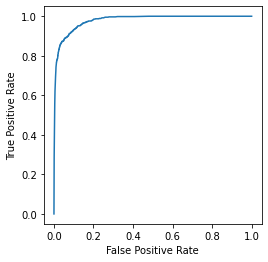

In [ ]:
window = 20
variable = ('step_speed', 'step_direction', 'gaps')

model = Lightning.load_from_checkpoint('results/SV_UNet_5s--epoch=4-val_loss=0.45-train_loss=0.48.ckpt', model=UNet(len(variable)), weight=30)
model.eval()
data = model.predict(data, window, variable)
roc_x, roc_y = model.roc(data['UNet'], data['dive'])

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.plot(roc_x, roc_y)
print(-np.trapz(roc_y, roc_x))

## CNNet

0.9708440147026267


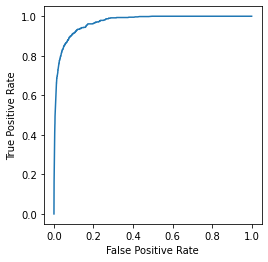

In [ ]:
window = 20
variable = ('step_speed', 'step_direction', 'gaps')

model = Lightning.load_from_checkpoint('results/SV_CNNet_5s--epoch=12-val_loss=0.49-train_loss=0.48.ckpt', model=CNNet(len(variable)), weight=30)
model.eval()
data = model.predict(data, window, variable)
roc_x, roc_y = model.roc(data['CNNet'], data['dive'])

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.plot(roc_x, roc_y)
print(-np.trapz(roc_y, roc_x))

## FCNet

0.8922911873957189


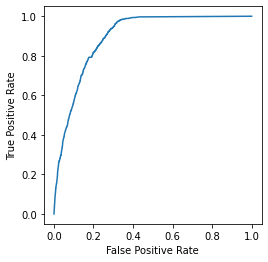

In [ ]:
window = 21
variable = ('step_speed', 'step_direction', 'gaps')

model = Lightning.load_from_checkpoint('results/SV_FCNet_5s--epoch=3-val_loss=0.61-train_loss=0.61.ckpt', model=FCNet(len(variable),21), weight = 30)
model.eval()
data = model.predict(data, window, variable)
roc_x, roc_y = model.roc(data['FCNet'], data['dive'])

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.plot(roc_x, roc_y)
print(-np.trapz(roc_y, roc_x))

In [ ]:
data.to_csv('./results/SV_guanape_from_SV.csv', index = False)

# testing from LB

## UNet

0.81585014411428


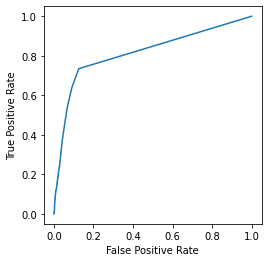

In [ ]:
window = 20
variable = ('step_speed', 'step_direction', 'gaps')

model = Lightning.load_from_checkpoint('results/LB_UNet_5s--epoch=4-val_loss=0.54-train_loss=0.46.ckpt', model=UNet(len(variable)), weight=30)
model.eval()
data = model.predict(data, window, variable)
roc_x, roc_y = model.roc(data['UNet'], data['dive'])

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.plot(roc_x, roc_y)
print(-np.trapz(roc_y, roc_x))

## CNNet

0.8722598498504658


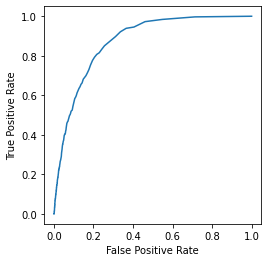

In [ ]:
window = 20
variable = ('step_speed', 'step_direction', 'gaps')

model = Lightning.load_from_checkpoint('results/LB_CNNet_5s--epoch=9-val_loss=0.57-train_loss=0.48.ckpt', model=CNNet(len(variable)), weight=30)
model.eval()
data = model.predict(data, window, variable)
roc_x, roc_y = model.roc(data['CNNet'], data['dive'])

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.plot(roc_x, roc_y)
print(-np.trapz(roc_y, roc_x))

## FCNet

0.776018001347904


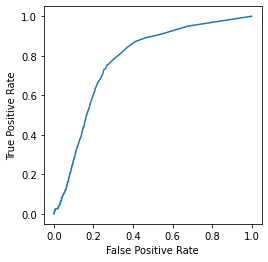

In [ ]:
window = 21
variable = ('step_speed', 'step_direction', 'gaps')

model = Lightning.load_from_checkpoint('results/LB_FCNet_5s--epoch=4-val_loss=0.67-train_loss=0.55.ckpt', model=FCNet(len(variable),21), weight = 30)
model.eval()
data = model.predict(data, window, variable)
roc_x, roc_y = model.roc(data['FCNet'], data['dive'])

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.plot(roc_x, roc_y)
print(-np.trapz(roc_y, roc_x))

In [ ]:
data.to_csv('./results/SV_guanape_from_LB.csv', index = False)